# Exploratory Data Analysis for Data Scientist in India

In [1]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset from Hugging Face and converting it to a pandas DataFrame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Converting the 'job_posted_date' column to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting 'job_skills' string representations of lists into actual Python lists
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Defining the target country for job filtering
v_job_country = 'India'

# Defining the target job title for analysis
v_job_title = 'Data Scientist'

# Number of top skills (by percentage) to include in the analysis
v_top_skills = 10

# Number of top skills to display per month in visualizations
skills_by_month = 5

In [3]:
# Filtering dataset for jobs posted in the specified country
df_Ind = df[df['job_country'] == v_job_country].copy()

# Further filtering for the specified job title within the selected country
df_DS_Ind = df[(df['job_country'] == v_job_country) & (df['job_title_short'] == v_job_title)].copy()

In [4]:
# Exploding the 'job_skills' list so each skill gets its own row for the country-level dataset
df_Ind_explode = df_Ind.explode('job_skills')

# Exploding the 'job_skills' list for the Data Scientist subset in the specified country
df_DS_Ind_explode = df_DS_Ind.explode('job_skills')

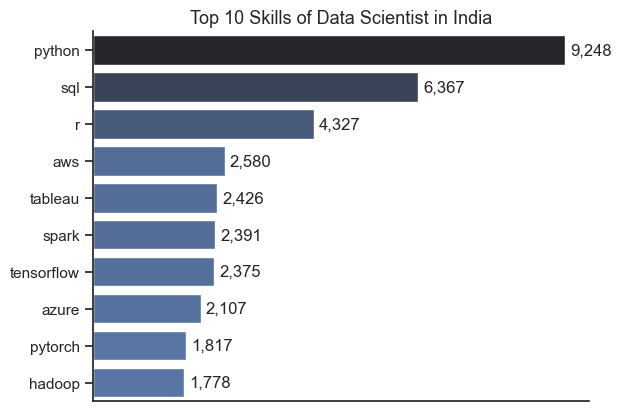

In [5]:
# Grouping exploded skills by count and selecting top skills based on the specified limit
DS_top_skills = df_DS_Ind_explode.groupby('job_skills').size().sort_values(ascending=False).head(v_top_skills).to_frame(name='skill_count')

# Setting Seaborn theme for cleaner plot aesthetics
sns.set_theme(style='ticks')

# Creating a horizontal barplot for top skills and their counts
sns.barplot(data=DS_top_skills,
            x='skill_count',
            y=DS_top_skills.index,    # Using index (skills) for y-axis
            hue='skill_count',
            palette='dark:b_r')

# Setting the plot title dynamically based on job title and country
plt.title(f"Top {v_top_skills} Skills of {v_job_title} in {v_job_country}", fontsize=13)

# Removing x and y axis labels for cleaner look
plt.xlabel("")
plt.ylabel("")

# Removing x-axis ticks for a minimalistic look
plt.xticks([])

# Adding count labels to the end of each bar for clarity
for i, count in enumerate(DS_top_skills['skill_count']):
    plt.text(count + 100, i, f"{count:,}", va='center')

# Removing the legend as hue is redundant here
plt.legend().remove()

# Removing top and right spines for a cleaner appearance
sns.despine()

# Displaying the final plot
plt.show()

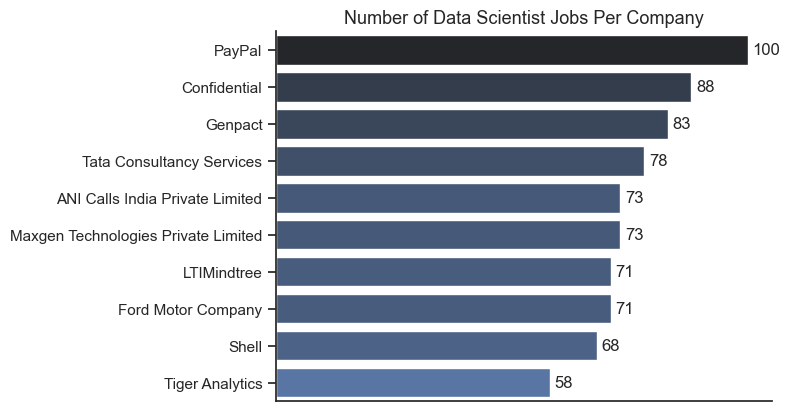

In [6]:
# Counting the number of job postings per company for the specified job title and country, selecting top companies
top_companies = df_DS_Ind['company_name'].value_counts().head(v_top_skills).to_frame(name='job_count')

# Setting Seaborn theme for consistent plot style
sns.set_theme(style='ticks')

# Creating a horizontal bar plot for job counts per company
sns.barplot(data=top_companies,
            x='job_count',
            y=top_companies.index,    # Using index (company names) for y-axis
            hue='job_count',
            palette='dark:b_r')

# Removing x-axis ticks for cleaner visualization
plt.xticks([])

# Adding text labels to each bar to show exact job counts
for i, count in enumerate(top_companies['job_count']):
    plt.text(count + 1, i, f"{count}", va='center')

# Removing legend as the hue does not add extra info here
plt.legend().remove()

# Removing the top and right spines for a cleaner look
sns.despine()

# Setting the plot title dynamically based on the job title
plt.title(f"Number of {v_job_title} Jobs Per Company", fontsize=13)

# Removing x and y axis labels for minimalism
plt.xlabel('')
plt.ylabel('')

# Displaying the plot
plt.show()


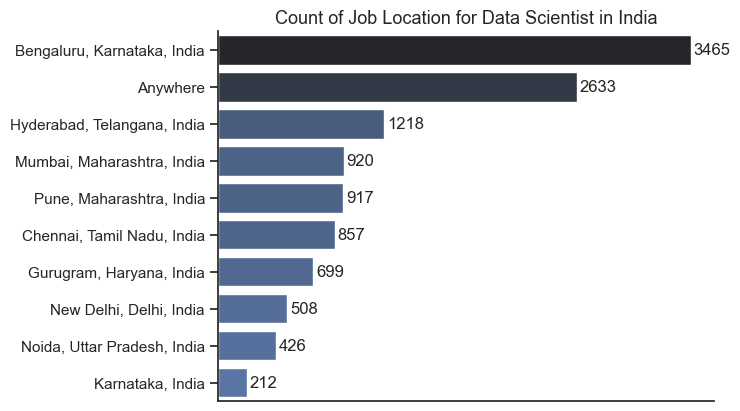

In [7]:
# Replacing 'India' with 'Anywhere' in the 'job_location' column to generalize location labels
df_DS_Ind['job_location'] = df_DS_Ind['job_location'].replace('India', 'Anywhere')

# Counting the number of job postings per location and selecting top locations
top_locations = df_DS_Ind['job_location'].value_counts().head(v_top_skills).to_frame(name='job_count')

# Setting Seaborn theme for consistent plot styling
sns.set_theme(style='ticks')

# Creating a horizontal barplot for top job locations
sns.barplot(data=top_locations,
            x='job_count',
            y=top_locations.index,    # Using index (locations) for y-axis
            hue='job_count',
            palette='dark:b_r')

# Removing x-axis ticks for a cleaner look
plt.xticks([])

# Adding count labels to each bar for clarity
for i, count in enumerate(top_locations['job_count']):
    plt.text(count + 20, i, f"{count}", va='center')

# Removing legend since the hue adds no extra info
plt.legend().remove()

# Removing top and right spines for visual neatness
sns.despine()

# Setting the plot title dynamically based on job title and country
plt.title(f"Count of Job Location for {v_job_title} in {v_job_country}", fontsize=13)

# Removing x and y axis labels for minimalism
plt.xlabel('')
plt.ylabel('')

# Displaying the plot
plt.show()

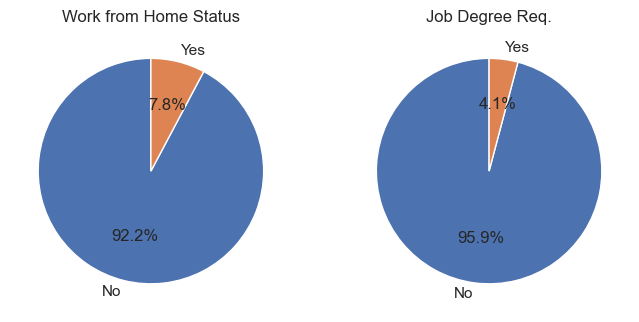

In [8]:
# Dictionary to map DataFrame columns to more readable titles for the plots
dict_columns = {
    'job_work_from_home': 'Work from Home Status',
    'job_no_degree_mention': 'Job Degree Req.'
}

# Creating a figure with 2 subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Looping over columns and titles to plot pie charts for each attribute
for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(
        df_DS_Ind[column].value_counts(),   # Counts of Yes/No values in the column
        startangle=90,                      # Starting angle for pie chart rotation
        autopct='%1.1f%%',                  # Display percentage on pie slices
        labels=['No', 'Yes']                # Custom labels for pie slices
    )
    ax[i].set_title(title)                  # Setting subplot title

# Displaying the pie charts
plt.show()